<a href="https://colab.research.google.com/github/Alexander-1380/Yandex_practicum/blob/main/Research_apartment_sale_advertisements/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BE_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B5_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследовательский анализ данных - Исследование объявлений о продаже квартир (проект выполнен в рамках обучения в Яндекс Практикуме)

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откроем файл с данными и изучим общую информацию.

In [ ]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


None

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

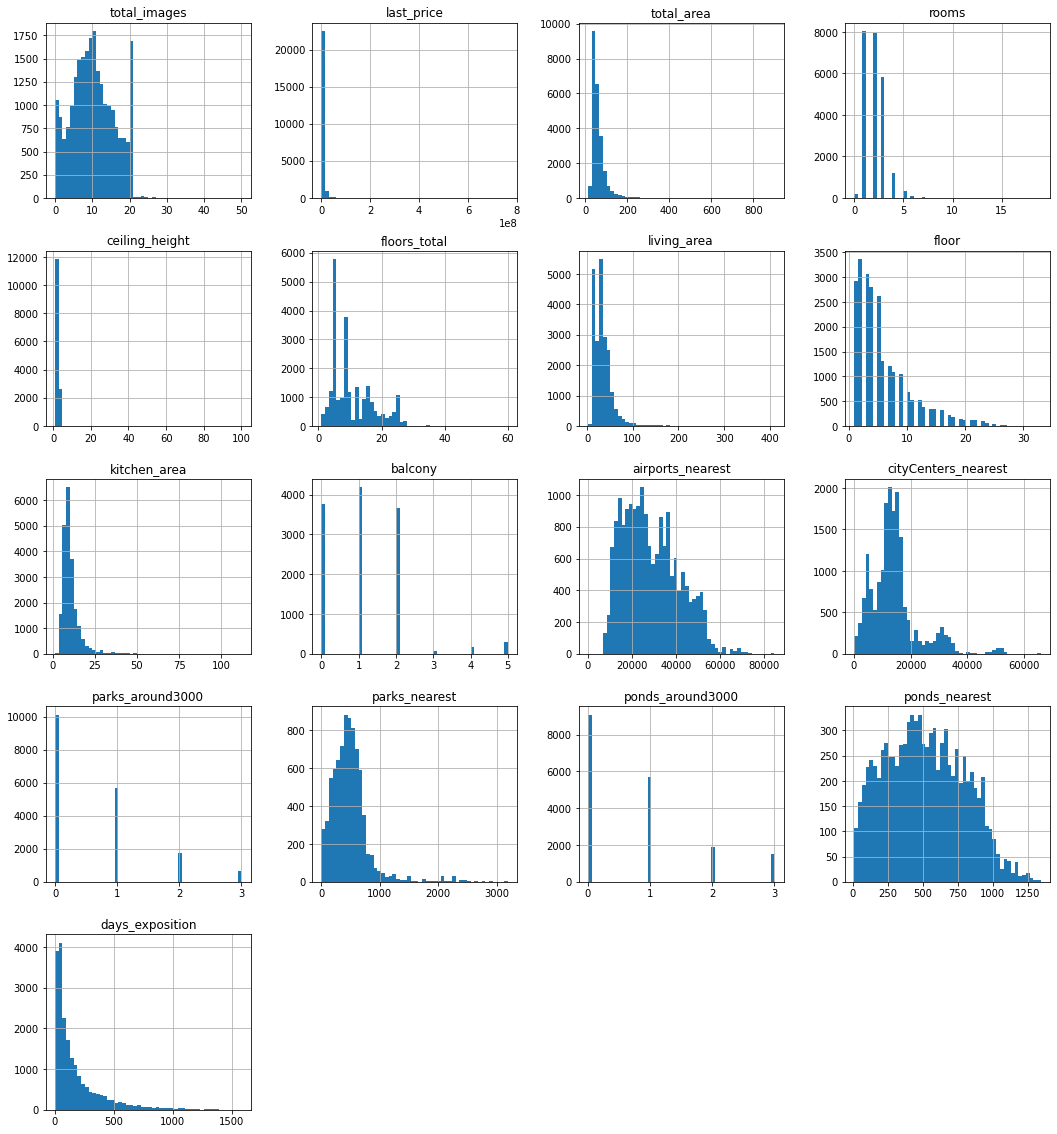

In [ ]:
# построим гистограммы всех числовых параметров
data.hist(bins=50, figsize=(18, 20))

В датафрейм входит 22 параметра, 23699 строк, имеются пропуски.

### Предобработка данных

#### посмотрим, в каких столбцах есть пропуски и сколько

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим пропуски в столбце количества балконов на ноль.
Проверим замену посчитав количество пропусков после нее

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Аналогично, скорее всего, если параметр 'is_apartment' не указан, то жилье не является апартаментом.
Заменим пропуски на False

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

К пропускам в данных, вписанных пользователем, привел скорее всего необязательный формат заполнения всех пунктов в анкете. К пропускам в данных, внесенных автоматически из картографического сервиса, скорее всего привели ограничения сервиса по радиусу поиска объектов на карте, либо не точная идентификация таких объектов.

#### посмотрим, в каких столбцах необходимо изменить тип данных
в столбце "first_day_exposition" указана дата, однако формат данных - строка. Заменим на формат datetime, выведем на экран для проверки

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

столбец is_apartment после заполнения пропусков хранит только данные булева типа, заменим формат на соответствующий. Для проверки выведем информацию о датафрейме

In [ ]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

общий промежуточный вывод.<br> в датафрейме присутствовали пропуски значений в столбцах:<br>

* balcony - люде не заполняли графу если балкон в квартире отсутствует, заполнили нулевыми значениями.<br>
* is_apartment - люди не заполняли графу если их квартира не является апартаментом, заполнили значениями False.<br>
* parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - данные автоматически добавлялись с помощью картографического сервиса, оставим пропуски в датафрейме.<br>
* days_exposition - данные о количестве дней до снятия объявления не заполнены скорее всего потому что часть объявлений были еще актуально на момент прекращения ведения статистики, оставим пропуски в датафрейме. <br>


были изменены типы данных в столбцах:<br>
* is_apartmen - на булев. <br>
* first_day_exposition - на datetime. <br>

Изменять тип данных необходимо для того, что бы возможно было производить со значениями в столбцах математические операции (находить средние и медианные значения, проводить операции сравнения, сложения и тд).

не рассмотренные ранее графы с пропусками:

* ceiling_height - высота потолков. Люди не указывали ее так как не хотели, она переменная либо они ее не знают. Заполнять пропуски каким-либо значением еще может исказить данные, оставляем пропуски.

* floors_total - всего этажей в доме. Данную графу могли не заполнить по разным причинам. Заполнять пропуски каким-либо значением может исказить данные, оставляем пропуски.

* living_area - жилая площадь. Данную графу могли не заполнить по разным причинам. Заполнять пропуски каким-либо значением может исказить данные, оставляем пропуски.

* kitchen_area - площадь кухни. Данную графу могли не заполнить по разным причинам. Заполнять пропуски каким-либо значением может исказить данные, оставляем пропуски.

* locality_name - наименование населенного пункта. Данную графу могли не заполнить по разным причинам. Заполнять пропуски каким-либо значением может исказить данные, оставляем пропуски.

данные также добавлены в промежуточный и общий выводы.




In [ ]:
data.duplicated().sum()

0

явных дубликатов нет.
Приведем некторые столбцы к нужным типам данных:

<div class="alert alert-info">
Видим, что сейчас перевести данные из типа float в тип int не получается из-за наличия пропусков. Посмотрим на их количество.
</div>

In [ ]:
data['floors_total'].isna().sum()

86

<div class="alert alert-info">
пропуски составляют 86 значений из 23699, можем отбросить эти строки.
</div>  

In [ ]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

In [ ]:
# теперь переведем в тип int
data['floors_total'] = data['floors_total'].astype('int')

In [ ]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.600000
floors_total,0.000000
living_area,7.900000
floor,0.000000
is_apartment,0.000000


<div class="alert alert-info">
Промежуточный общий вывод v.2
    
В датафрейме присутствовали пропуски значений в столбцах:<br>

* balcony - люде не заполняли графу если балкон в квартире отсутствует, заполнили нулевыми значениями.<br>
* is_apartment - люди не заполняли графу если их квартира не является апартаментом, заполнили значениями False.<br>
* parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - данные автоматически добавлялись с помощью картографического сервиса, оставим пропуски в датафрейме.<br>
* days_exposition - данные о количестве дней до снятия объявления не заполнены скорее всего потому что часть объявлений были еще актуально на момент прекращения ведения статистики, оставим пропуски в датафрейме. <br>
* ceiling_height - высота потолков. Люди не указывали ее так как не хотели, она переменная либо они ее не знают. Заполнять пропуски каким-либо значением еще может исказить данные, оставляем пропуски.
* floors_total - всего этажей в доме. Данную графу могли не заполнить по разным причинам. Заполнять пропуски каким-либо значением может исказить данные, оставляем пропуски.
* living_area - жилая площадь. Данную графу могли не заполнить по разным причинам. Заполнять пропуски каким-либо значением может исказить данные, оставляем пропуски.
* kitchen_area - площадь кухни. Данную графу могли не заполнить по разным причинам. Заполнять пропуски каким-либо значением может исказить данные, оставляем пропуски.
* locality_name - наименование населенного пункта. Данную графу могли не заполнить по разным причинам. Заполнять пропуски каким-либо значением может исказить данные, оставляем пропуски.

были изменены типы данных в столбцах:<br>
* is_apartment - на булев. <br>
* first_day_exposition - на datetime. <br>
* balcony - на int.<br>

Изменять тип данных необходимо для того, что бы возможно было производить со значениями в столбцах математические операции (находить средние и медианные значения, проводить операции сравнения, сложения и тд).
</div>

#### Нужно изучить уникальные значения в столбце с названиями и устранить неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Можно заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [ ]:
# посмотрим какие названия встречаются в списке
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Зададим функцию, которая будет вычленять имя собственное каждого географического названия, затем заменим этим именем данные столбца 'locality_name'

In [ ]:
def clean_name(name):
    ban_list = (['посёлок', 'поселок', 'городской', 'городского', 'типа', 'село',
                 'деревня', 'имени', 'садовое', 'товарищество' 'садоводческое',
                 'некоммерческое', 'при', 'железнодорожной', 'станции', 'коттеджный']
    )
    lst = name.split(sep=' ')
    for word in ban_list:
        if word in lst:
            lst.remove(word)
    result = ' '.join(lst)
    if 'ё' in result:
        result = result.replace('ё', 'е')
    return result


for name in data['locality_name'].unique():
    try:
        data.loc[data['locality_name']==name, 'locality_name'] = clean_name(name)
    except:
        pass


print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'товарищество Новая Ропша' 'Павловск' 'Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи'
 'Аннино' 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги'

После устранения неявных дубликатов в столбце названий населенных пунктов количество уникальных названий сократилось с 365 до 308

#### Найдем и устраним редкие и выбивающиеся значения.
Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуем обработать аномалии в этом и других столбцах.<br>
Если природа аномалии понятна и данные действительно искажены, то нужно восстановить корректное значение. <br>
В противном случае удалим редкие и выбивающиеся значения.<br>



Посмотрим на значения в столбце ceiling_height. Для этого построим гистограмму покрупнее

<AxesSubplot:ylabel='Frequency'>

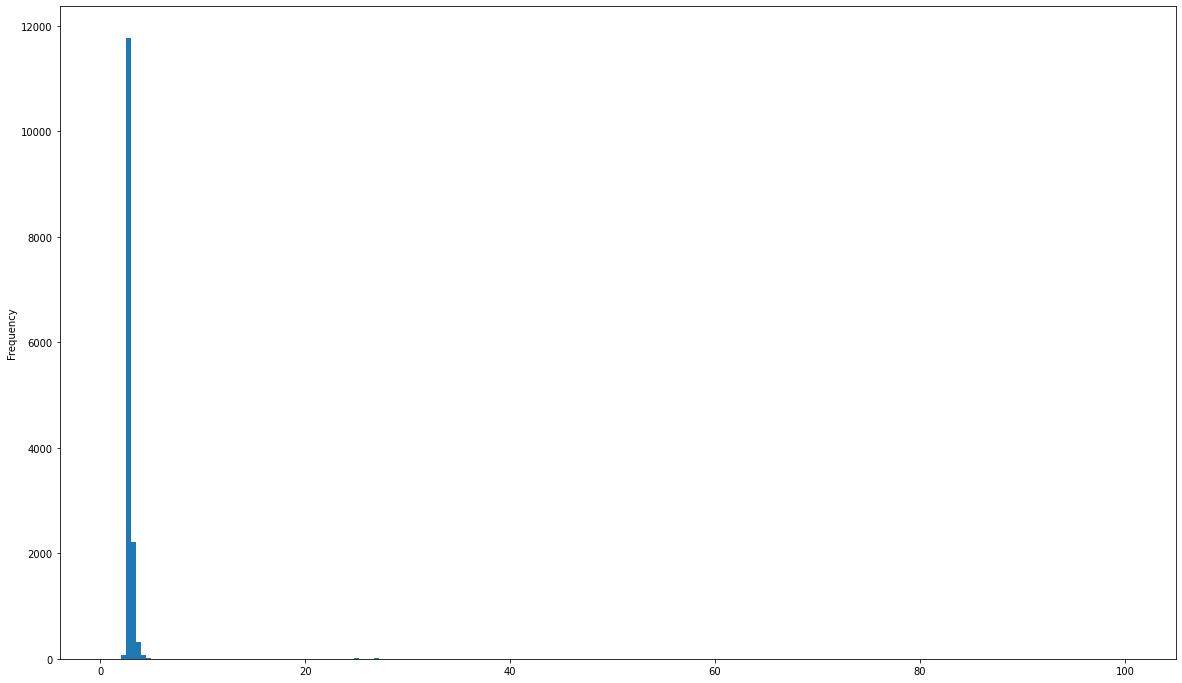

In [ ]:
data['ceiling_height'].plot(kind='hist', bins=200, figsize=(20,12))

значения высоты потолка в пределах от 20 до 60 м разделим на 10 исходя из предположения, что высота была указана в других единицах.

In [ ]:
data.loc[(data['ceiling_height']>=20) & (data['ceiling_height']<=60), 'ceiling_height'] = data['ceiling_height'] / 10
data.query('ceiling_height>=10')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16,15.5,15,False,...,NaN,0.0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Осталось небольшое количество значений больше 10м. Удалим эти данные из датасета

In [ ]:
data = data.loc[data['ceiling_height']<10]
data['ceiling_height'].unique()

array([2.7 , 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 1.2 , 8.3 , 2.98, 2.86, 3.17, 4.4 ,
       3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 ,
       3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.

Проверим данные на ошибки - есть ли такие квартиры, у которых жилая площадь либо площадь кухни больше чем общая площадь

In [ ]:
data.loc[(data['kitchen_area']>data['total_area']) | (data['living_area']>data['total_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Видим, что таких нет.

По даным наблюдаем небольшое число аномалий: <br>
* квартиры с общей площадью более 300,
* количеством комнат более 10,
* этажом выше 40,
* общим количеством этажей в доме боле 40,
* жилой площадью более 200 кв.м.,
* площадью кухни более 60 кв.м.,
* количеством балконов более 3,
* ценой более 60 млн руб.,
* высотой потолков менее 2 м и выше 5 м.

Искажениями эти данные не являются, однако согласно заданию удалим их. Создадим для этого новый датафрейм good_data. Построим гистограммы для него.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

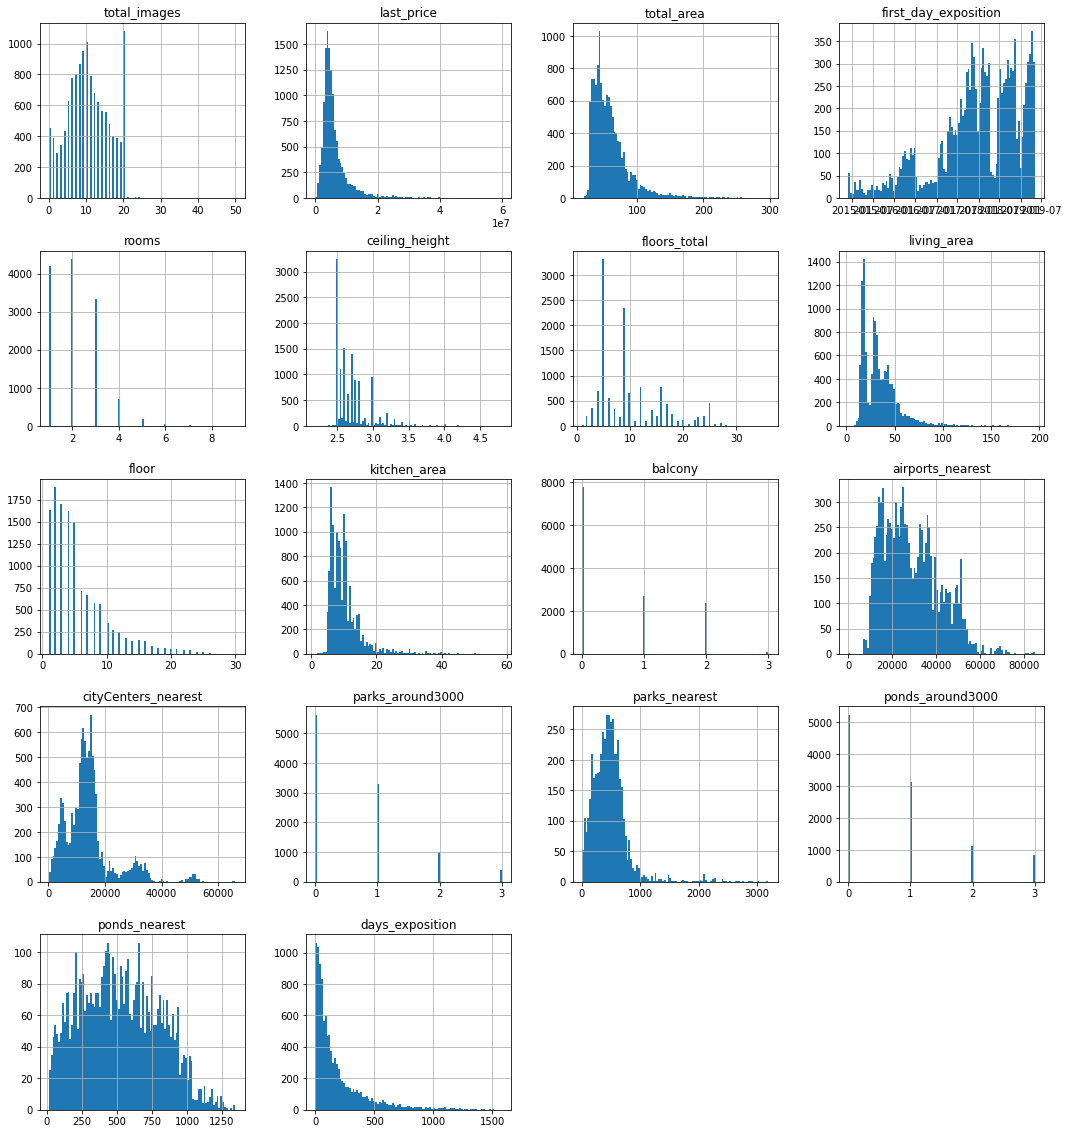

In [ ]:
good_data = data.query(
    'total_area<300 and rooms<10 and floor<40 and floors_total<40 and balcony<4 and living_area<200 and kitchen_area<60 and last_price < 60_000_000 and 2<ceiling_height<5')
good_data.hist(bins=100, figsize=(18, 20))

In [ ]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12889 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          12889 non-null  int64         
 1   last_price            12889 non-null  float64       
 2   total_area            12889 non-null  float64       
 3   first_day_exposition  12889 non-null  datetime64[ns]
 4   rooms                 12889 non-null  int64         
 5   ceiling_height        12889 non-null  float64       
 6   floors_total          12889 non-null  int64         
 7   living_area           12889 non-null  float64       
 8   floor                 12889 non-null  int64         
 9   is_apartment          12889 non-null  bool          
 10  studio                12889 non-null  bool          
 11  open_plan             12889 non-null  bool          
 12  kitchen_area          12889 non-null  float64       
 13  balcony         

Очищенные данные включают в себя 12889 строк

### Добавим в таблицу новые столбцы

#### Шаг 3. Добавим в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра: <br>


In [ ]:
good_data['square_m_price'] = (good_data['last_price'] / good_data['total_area']).round(0)
good_data['square_m_price']

/tmp/ipykernel_142/539520113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['square_m_price'] = (good_data['last_price'] / good_data['total_area']).round(0)


0        120370.0
4        100000.0
9         88525.0
10       127525.0
13        82944.0
           ...   
23689    100567.0
23691    129904.0
23693     73718.0
23694     72491.0
23698     41796.0
Name: square_m_price, Length: 12889, dtype: float64

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); <br>

In [ ]:
good_data['exposition_day_of_week'] = pd.DatetimeIndex(good_data['first_day_exposition']).day_name()
good_data['exposition_day_of_week'].head()

/tmp/ipykernel_142/880206515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['exposition_day_of_week'] = pd.DatetimeIndex(good_data['first_day_exposition']).day_name()


0     Thursday
4      Tuesday
9       Sunday
10    Thursday
13    Saturday
Name: exposition_day_of_week, dtype: object

месяц публикации объявления;<br>

In [ ]:
good_data['exposition_month'] = pd.DatetimeIndex(good_data['first_day_exposition']).month_name()
good_data['exposition_month'].head()

/tmp/ipykernel_142/1977076436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['exposition_month'] = pd.DatetimeIndex(good_data['first_day_exposition']).month_name()


0        March
4         June
9     February
10    November
13        July
Name: exposition_month, dtype: object

год публикации объявления:

In [ ]:
good_data['exposition_year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year
good_data['exposition_year'].head()

/tmp/ipykernel_142/3436544093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['exposition_year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year


0     2019
4     2018
9     2017
10    2017
13    2017
Name: exposition_year, dtype: int64

тип этажа квартиры (значения — «первый», «последний», «другой»). Зададим с помощью функции floor_type(). Для проверки выведем новый столбец на экран.

In [ ]:
def floor_type(df):
    a = df['floor']
    b = df['floors_total']
    if a == 1:
        return 'первый'
    elif a == b:
        return 'последний'
    return 'другой'


good_data['floor_type'] = good_data[['floor', 'floors_total']].apply(floor_type, axis=1)
good_data['floor_type']

/tmp/ipykernel_142/326152226.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['floor_type'] = good_data[['floor', 'floors_total']].apply(floor_type, axis=1)


0           другой
4           другой
9           другой
10          другой
13       последний
           ...    
23689       другой
23691       другой
23693       другой
23694       другой
23698       первый
Name: floor_type, Length: 12889, dtype: object

расстояние до центра города в километрах (переведите из м в км и округлите до целых значений). Выведем новый столбец на экран

In [ ]:
good_data['city_centers_km'] = round(good_data['cityCenters_nearest'] / 1000)
good_data['city_centers_km']

/tmp/ipykernel_142/2529180142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['city_centers_km'] = round(good_data['cityCenters_nearest'] / 1000)


0        16.0
4         8.0
9        15.0
10       14.0
13       33.0
         ... 
23689    16.0
23691     4.0
23693    34.0
23694     4.0
23698     NaN
Name: city_centers_km, Length: 12889, dtype: float64

Промежуточный вывод.
Были добавлены в датафрейм столбцы с информацией:
* цена одного квадратного метра,
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее),
* месяц публикации объявления,
* год публикации объявления,
* тип этажа квартиры (значения — «первый», «последний», «другой»),
* расстояние до центра города в километрах.

### Проведем исследовательский анализ данных

#### Изучим следующие параметры объектов:
общая площадь;<br>
жилая площадь;<br>
площадь кухни;<br>
цена объекта;<br>
количество комнат;<br>
высота потолков;<br>
этаж квартиры;<br>
тип этажа квартиры («первый», «последний», «другой»);<br>
общее количество этажей в доме;<br>
расстояние до центра города в метрах;<br>
расстояние до ближайшего аэропорта;<br>
расстояние до ближайшего парка;<br>
день и месяц публикации объявления.<br>
Построим отдельные гистограммы для каждого из этих параметров. Опишем все наблюдения.<br>

count    12889.000000
mean        60.014977
std         29.343234
min         17.000000
5%          31.000000
50%         52.900000
95%        114.720000
max        297.500000
Name: total_area, dtype: float64

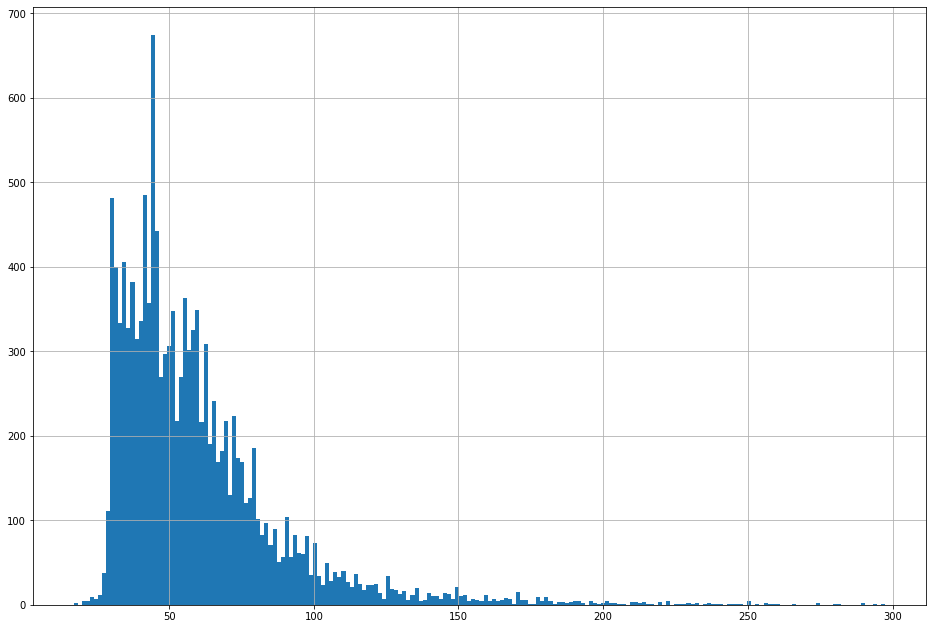

In [ ]:
good_data['total_area'].hist(bins=200, figsize=(16,11))
good_data['total_area'].describe(percentiles=[.05,.5,.95])

После удаления аномалий и пропусков данных распределение параметра общей площади напоминает распределение Пуассона. Медианное значение 52,9 кв м. 90% значений лежат в диапазоне от 31 до 114 кв.м.

count    12889.000000
mean        34.731276
std         19.518920
min          2.000000
5%          15.600000
50%         30.500000
95%         69.160000
max        195.000000
Name: living_area, dtype: float64

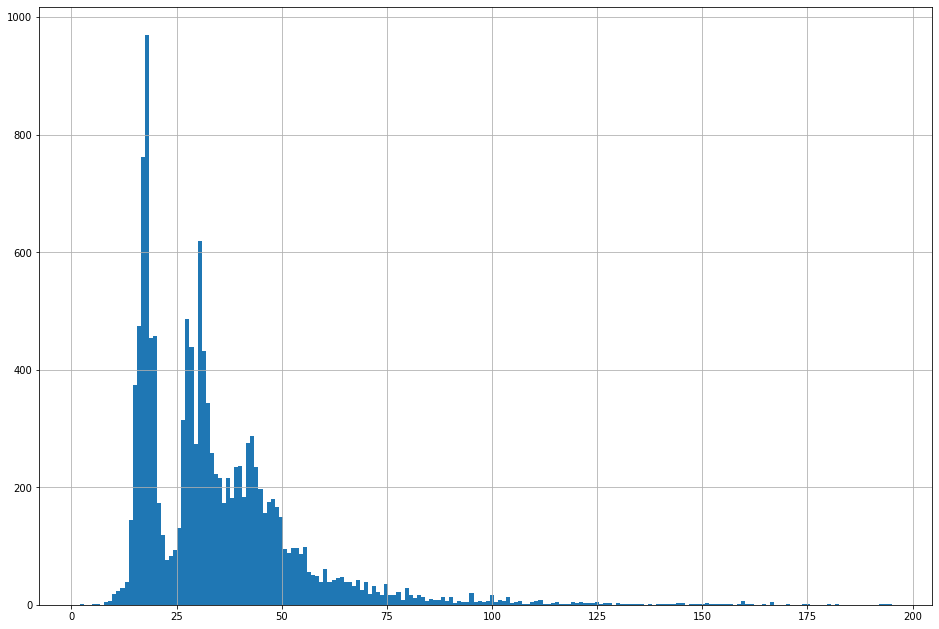

In [ ]:
good_data['living_area'].hist(bins=200, figsize=(16,11))
good_data['living_area'].describe(percentiles=[.05,.5,.95])

После удаления аномалий и пропусков данных распределение параметра жилой площади напоминает распределение Пуассона. Медианное значение 30.5 кв м. 90% значений лежат в диапазоне от 15.6 до 69.2 кв.м.

count    12889.000000
mean        10.297838
std          5.310197
min          1.300000
5%           5.500000
50%          9.000000
95%         19.700000
max         58.400000
Name: kitchen_area, dtype: float64

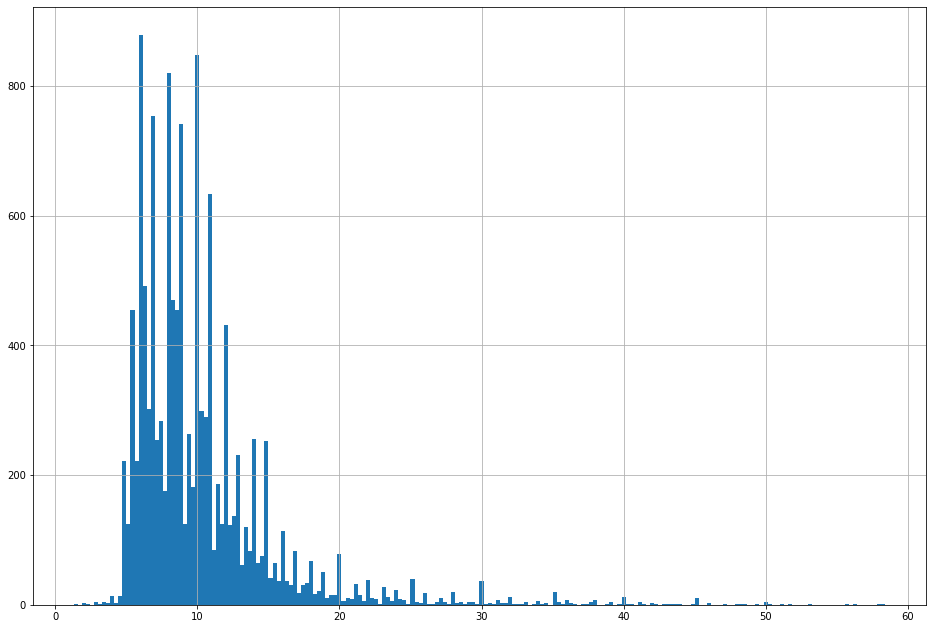

In [ ]:
good_data['kitchen_area'].hist(bins=200, figsize=(16,11))
good_data['kitchen_area'].describe(percentiles=[.05,.5,.95])

После удаления аномалий и пропусков данных распределение параметра площади кухни напоминает распределение Пуассона. Медианное значение 9.0 кв м. 90% значений лежат в диапазоне от 5.5 до 19.7 кв.м.

count    1.288900e+04
mean     6.222293e+06
std      5.167409e+06
min      1.219000e+04
5%       2.099000e+06
50%      4.800000e+06
95%      1.490000e+07
max      5.991412e+07
Name: last_price, dtype: float64

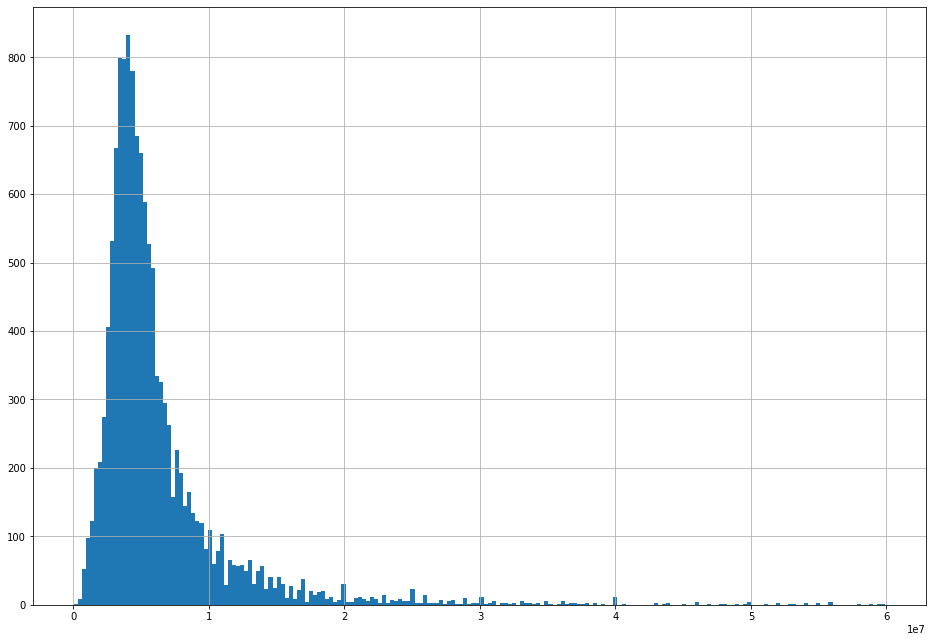

In [ ]:
good_data['last_price'].hist(bins=200, figsize=(16,11))
good_data['last_price'].describe(percentiles=[.05,.5,.95])

После удаления аномалий и пропусков данных распределение параметра цена варьируется от 0.012 до 60 млн руб. Медианное значение 4.8 млн руб, 90% значений лежат в диапазоне от 2.1 до 14.9 млн руб.

<AxesSubplot:>

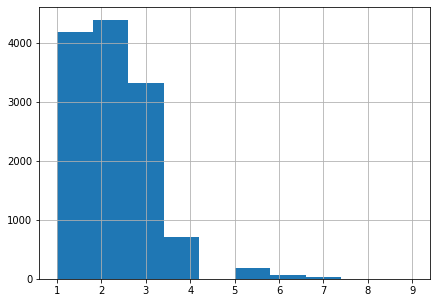

In [ ]:
good_data['rooms'].hist(bins=10, figsize=(7,5))

Преобладающее количество комнат - 1,2 и 3.

<AxesSubplot:>

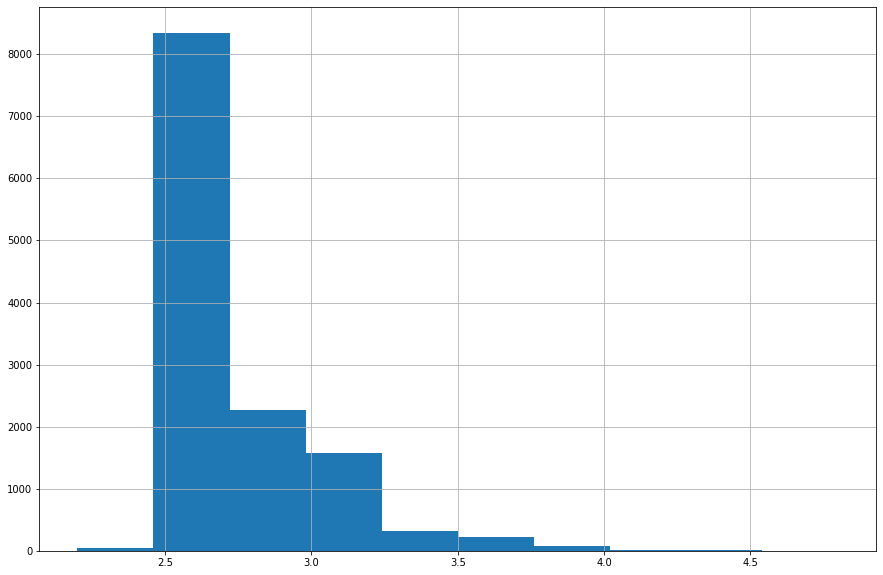

In [ ]:
good_data['ceiling_height'].hist(bins=10, figsize=(15,10))

Высота потолков варьируется от 2 до 4.5 м. Преобладающая высота - 2.5 метра.

count    12889.000000
mean         5.564668
std          4.563031
min          1.000000
5%           1.000000
50%          4.000000
95%         15.000000
max         30.000000
Name: floor, dtype: float64

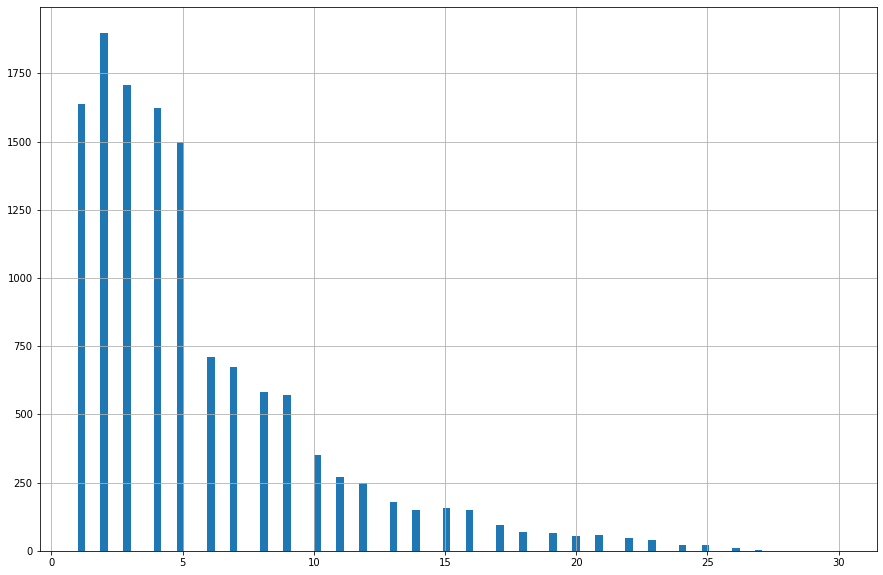

In [ ]:
good_data['floor'].hist(bins=100, figsize=(15,10))
good_data['floor'].describe(percentiles=[.05,.5,.95])

Квартиры находятся на этажах от 1 до 30-го, 90% квартир находятся до 15 этажа. Наибольшее количество с 1 по 5.

<AxesSubplot:>

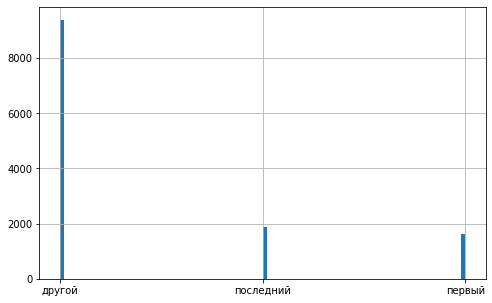

In [ ]:
good_data['floor_type'].hist(bins=100, figsize=(8,5))

Около 70% квартир находятся не на первых и последних этажах.

<AxesSubplot:>

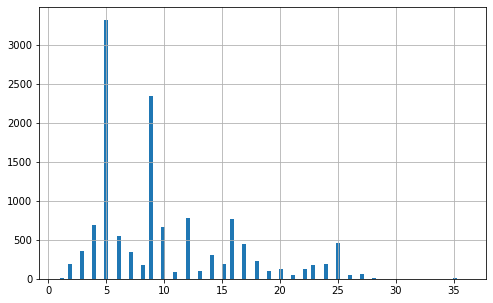

In [ ]:
good_data['floors_total'].hist(bins=100, figsize=(8,5))

Преобладающее большинство квартир находятся в 5-ти и 9-тиэтажных домах. Можно объяснить большим количеством типовых домов этой этажности в РФ.

count    10334.000000
mean     14159.584962
std       8800.942785
min        181.000000
5%        3418.300000
50%      13023.000000
95%      32191.900000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

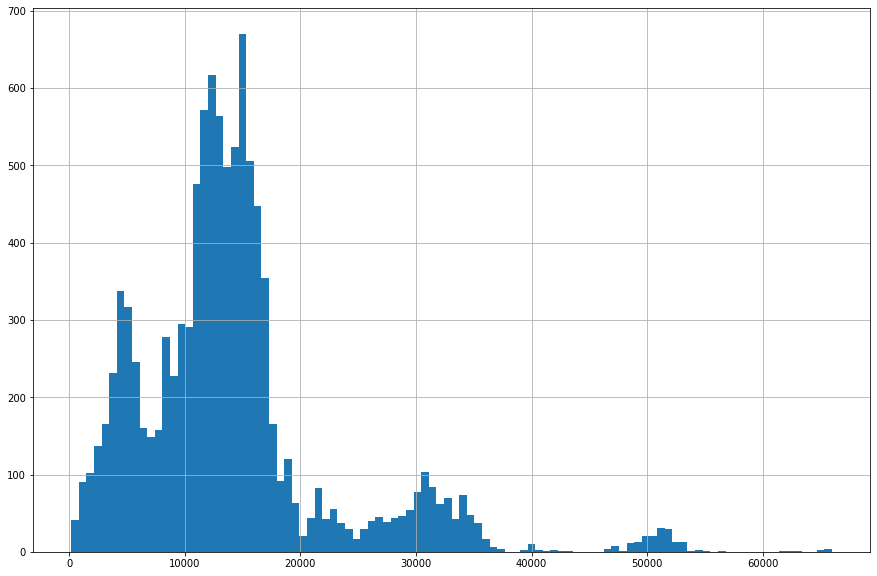

In [ ]:
good_data['cityCenters_nearest'].hist(bins=100, figsize=(15,10))
good_data['cityCenters_nearest'].describe(percentiles=[.05,.5,.95])

Наибольшее число квартир удалены от центра города на расстояние от 0 до 40 км. Видим всплек прежложений квартир на расстоянии от 4 до 6 км от центра, и еще бОльший всплеск предложений на расстоянии от 10 до 18 км от центра.

count    10317.000000
mean     28819.066977
std      12691.790736
min          0.000000
5%       11752.000000
50%      26706.000000
95%      51331.000000
max      84869.000000
Name: airports_nearest, dtype: float64

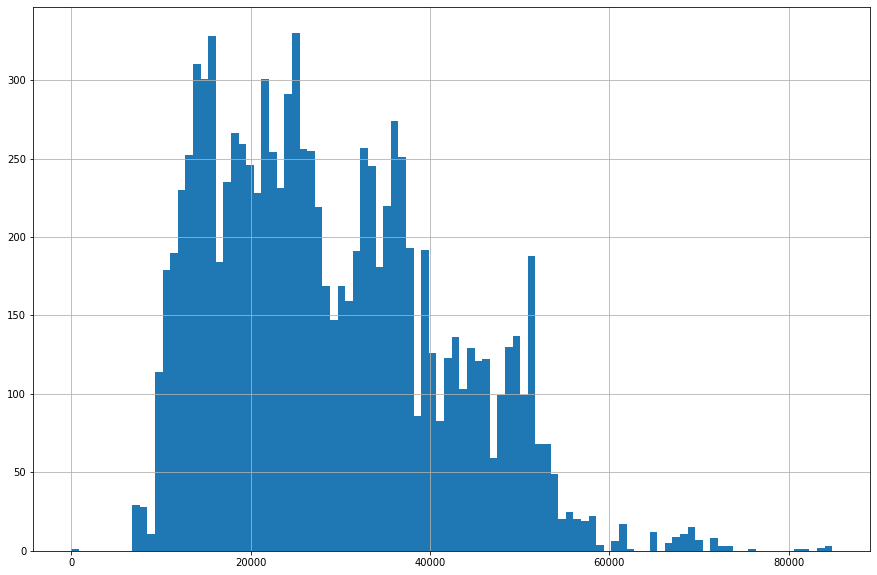

In [ ]:
good_data['airports_nearest'].hist(bins=100, figsize=(15,10))
good_data['airports_nearest'].describe(percentiles=[.05,.5,.95])

Наибольшее число квартир (90%) удалены от аэропорта на расстояние от 10 до 51 км. Среднее значение расстояния 26 км.

count    4714.000000
mean      476.075520
std       316.882756
min         3.000000
5%         97.000000
50%       448.000000
95%       893.000000
max      3190.000000
Name: parks_nearest, dtype: float64

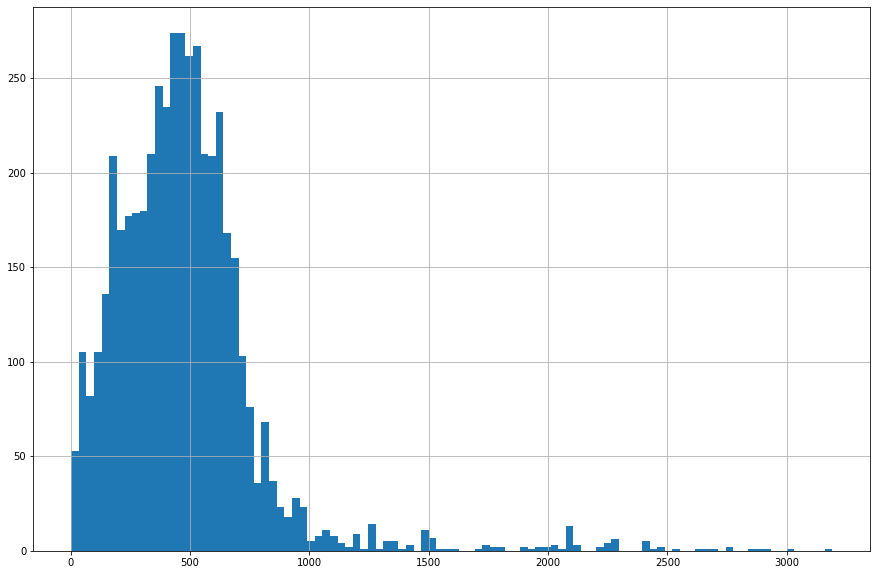

In [ ]:
good_data['parks_nearest'].hist(bins=100, figsize=(15,10))
good_data['parks_nearest'].describe(percentiles=[.05,.5,.95])

Наибольшее число квартир (90%) удалены от парков на расстояние от 100 до 893 м. Среднее значение расстояния 476 м.

/tmp/ipykernel_142/1194572731.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  good_data['first_day_exposition'].describe(percentiles=[.05,.5,.95])


count                   12889
unique                   1377
top       2018-02-01 00:00:00
freq                      202
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

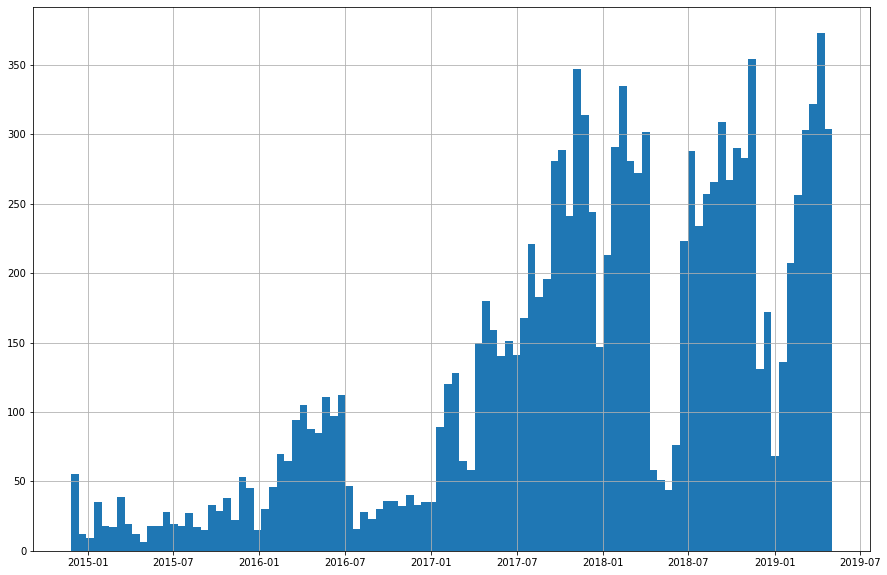

In [ ]:
good_data['first_day_exposition'].hist(bins=100, figsize=(15,10))
good_data['first_day_exposition'].describe(percentiles=[.05,.5,.95])

Наблюдаем что со временем число предложений квартир растет. Наибольший рост произошел в течение 2017 года. Предложение наблюдаем сезонные спады в районе нового года.

<AxesSubplot:>

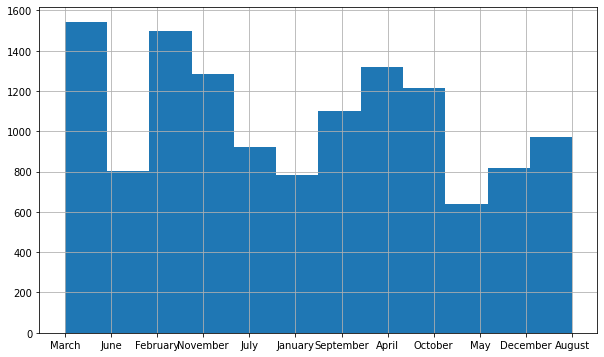

In [ ]:
good_data['exposition_month'].hist(bins=12, figsize=(10,6))

По гистограмме месяцев размещения объявлений можно сделать вывод, что наибольшее количество новых объявлений появляется в феврале-апреле, а в мае и декабре-январе происходит спад. Вероятная причина - длинные праздники в РФ.

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Построим гистограмму.<br>
Посчитаем среднее и медиану.<br>
Узнаем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?<br>

count    10706.000000
mean       191.940220
std        228.684146
min          1.000000
5%           8.000000
50%        107.000000
95%        676.000000
max       1580.000000
Name: days_exposition, dtype: float64

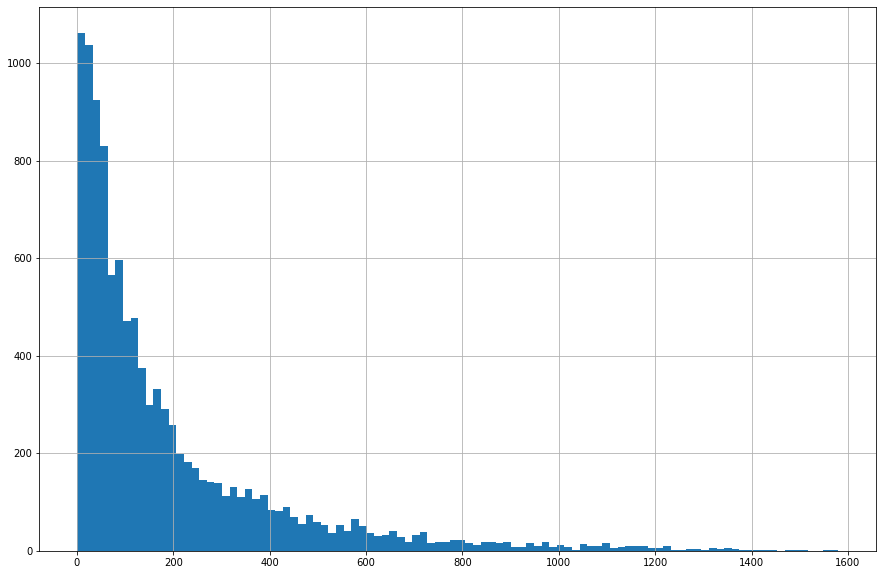

In [ ]:
good_data['days_exposition'].isna().sum()
good_data['days_exposition'].hist(bins=100, figsize=(15,10))
good_data['days_exposition'].describe(percentiles=[.05,.5,.95])

In [ ]:
print(f'среднее количество дней до продажи: {good_data["days_exposition"].mean().round()}')
print(f'медианное количество дней до продажи: {good_data["days_exposition"].median()}')

среднее количество дней до продажи: 192.0
медианное количество дней до продажи: 107.0


90% квартир продаются в период от 8 до 676 дней, медианное значение 107, менее 8 дней занимают 5% продаж - это можно считать необычно быстрыми, более 676 дней - необычно долгими.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим, зависит ли цена от:<br>
общей площади;<br>
жилой площади;<br>
площади кухни;<br>
количества комнат;<br>
этажа, на котором расположена квартира (первый, последний, другой);<br>
даты размещения (день недели, месяц, год).<br>
Построим графики, которые покажут зависимость цены от указанных выше параметров.

0.7863930773136094

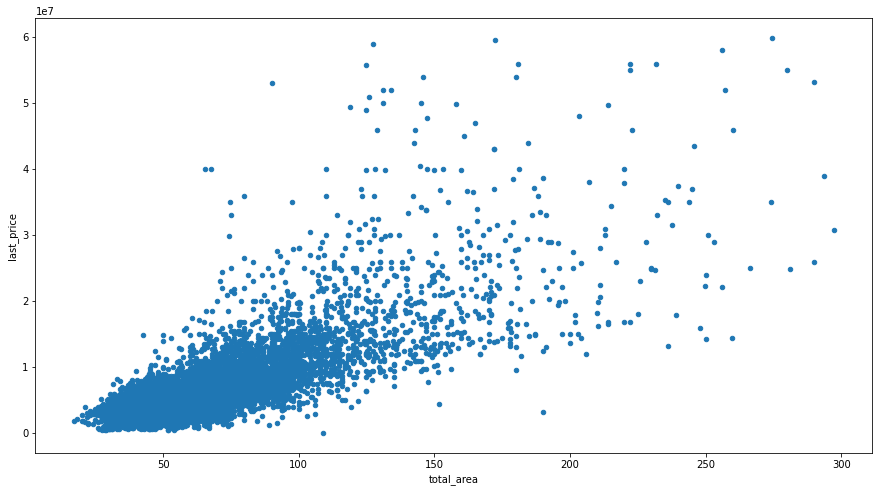

In [ ]:
good_data.plot(kind='scatter', x='total_area', y='last_price', figsize=(15,8))
good_data['total_area'].corr(good_data['last_price'])

Наблюдаем корреляцию между ценой и общей площадью. Предположим, что цена зависит от общей площади. Коэффициент корреляции 0.79

0.6912136525058192

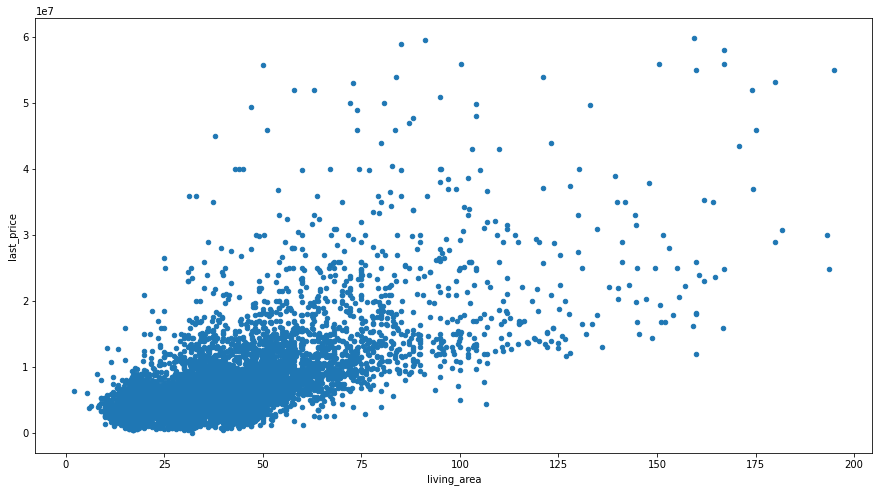

In [ ]:
good_data.plot(kind='scatter', x='living_area', y='last_price', figsize=(15,8))
good_data['living_area'].corr(good_data['last_price'])

Наблюдаем корреляцию между ценой и жилой площадью. Предположим, что цена зависит от жилой площади. Коэффициент корреляции 0.69 - меньше влияет на цену чем общая площадь. Зависимость более выражена для значений жилой площади до 80 кв.м..

0.5846674674384462

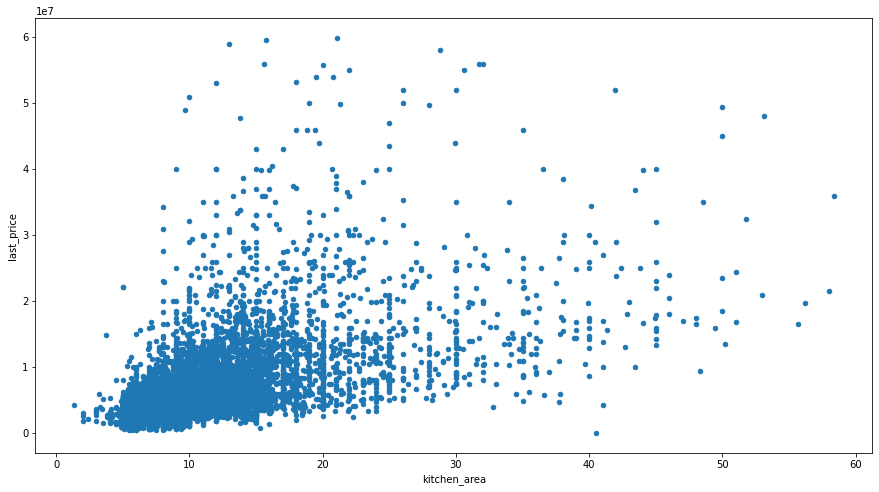

In [ ]:
good_data.plot(kind='scatter', x='kitchen_area', y='last_price', figsize=(15,8))
good_data['kitchen_area'].corr(good_data['last_price'])

Наблюдаем корреляцию между ценой и площадью кухни в диапазоне от 5 до 20 кв. Предположим, что цена зависит от площади кухни. Коэффициент корреляции 0.58 - меньше влияет на цену чем общая площадь. Зависимость более выражена для значений площади кухни до 20 кв.м.

0.5061096487706696

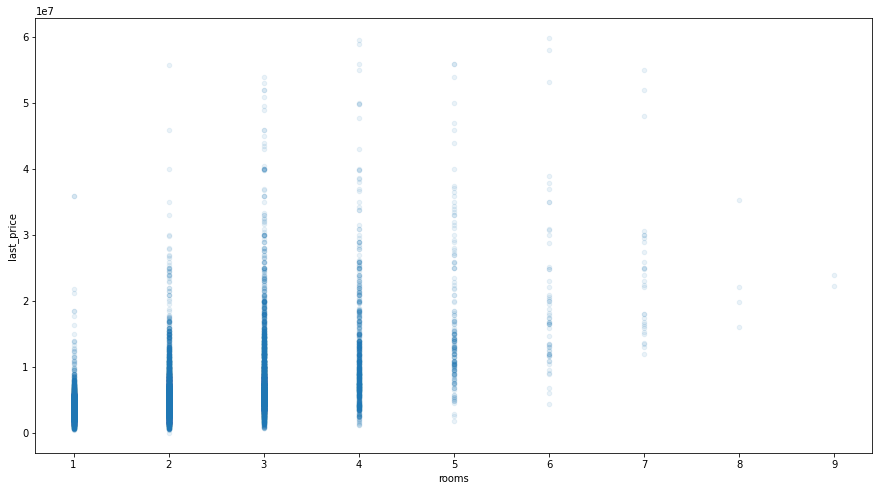

In [ ]:
good_data.plot(kind='scatter', x='rooms', y='last_price', figsize=(15,8), alpha=0.09)
good_data['rooms'].corr(good_data['last_price'])

Наблюдаем несильную положительную корреляцию между количеством комнат и ростом цены от 1 до 4 комнат, далее зависимость размывается. Коэффициент корреляции 0.51

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

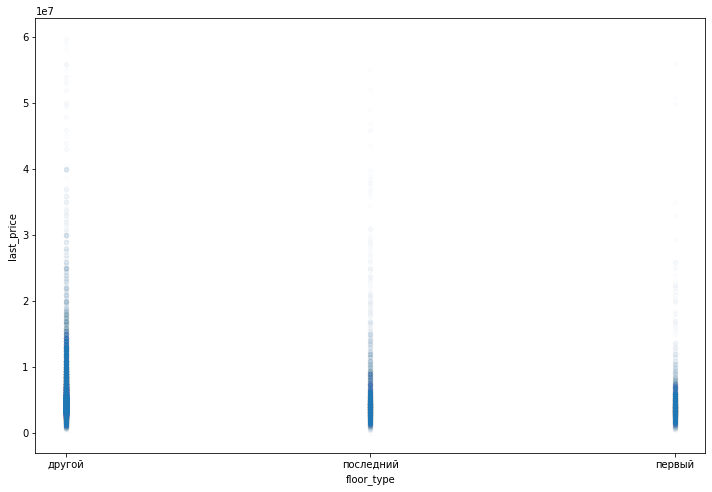

In [ ]:
good_data.plot(kind='scatter', x='floor_type', y='last_price', figsize=(12,8), alpha=0.01)

Квартиры на первых этажах в большинстве своем дешевле чем квартиры на последних, а те дешевле чем квартиры на промежуточных этажах

<AxesSubplot:xlabel='exposition_day_of_week', ylabel='last_price'>

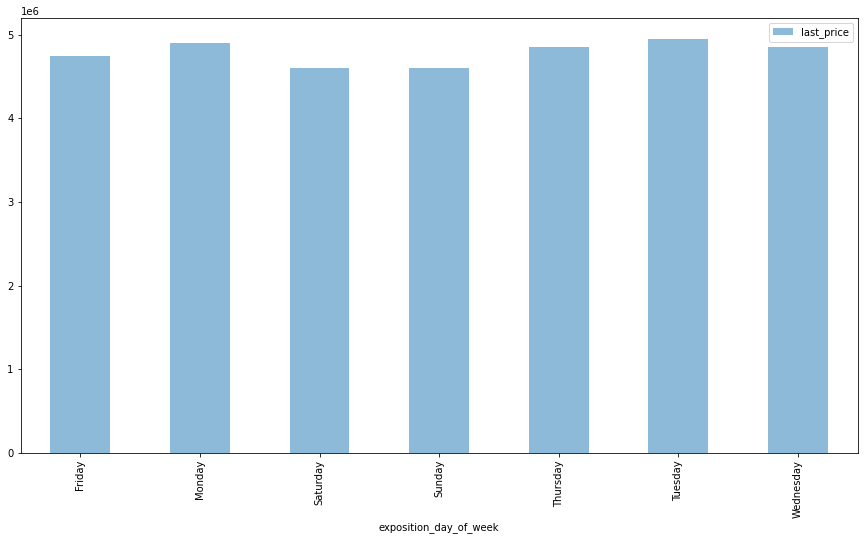

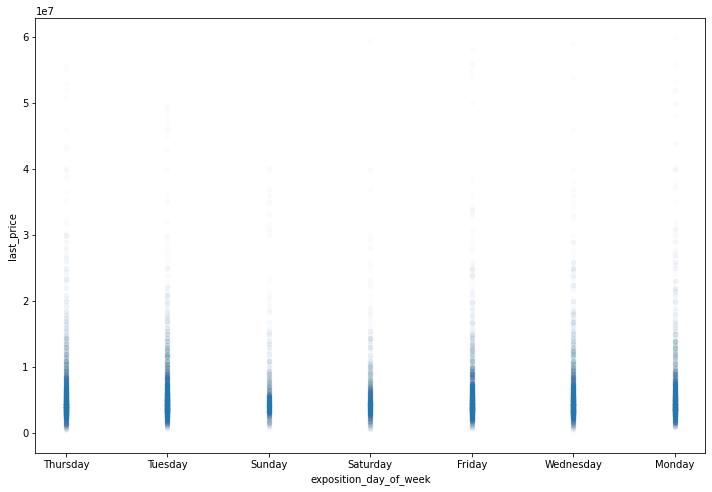

In [ ]:
good_data.pivot_table(index='exposition_day_of_week',
                      values='last_price', aggfunc='median').plot(kind='bar', figsize=(15,8), alpha=0.5)
good_data.plot(kind='scatter', x='exposition_day_of_week', y='last_price', figsize=(12,8), alpha=0.01)

Построив столбчатую диаграмму медианного значения цены и диаграмму рассеяния можем сделать вывод, что цена не зависит от дня недели размещения объявления

<AxesSubplot:xlabel='exposition_month', ylabel='last_price'>

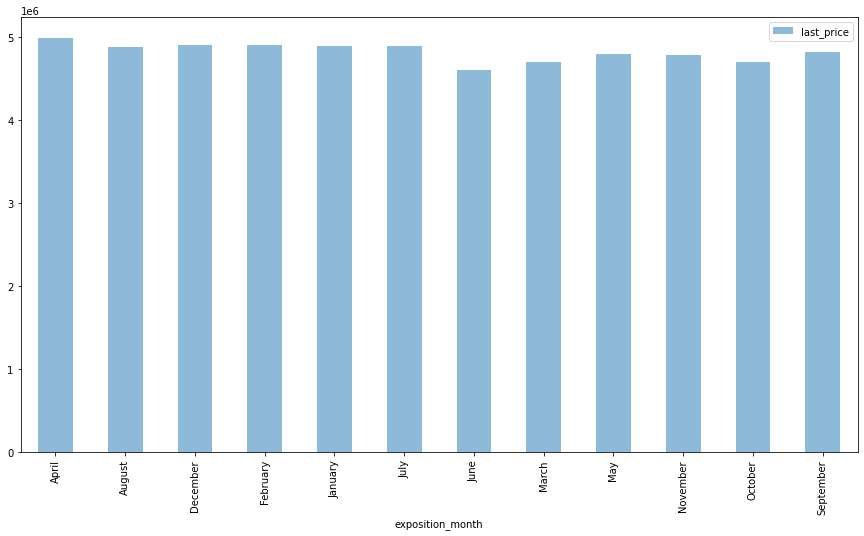

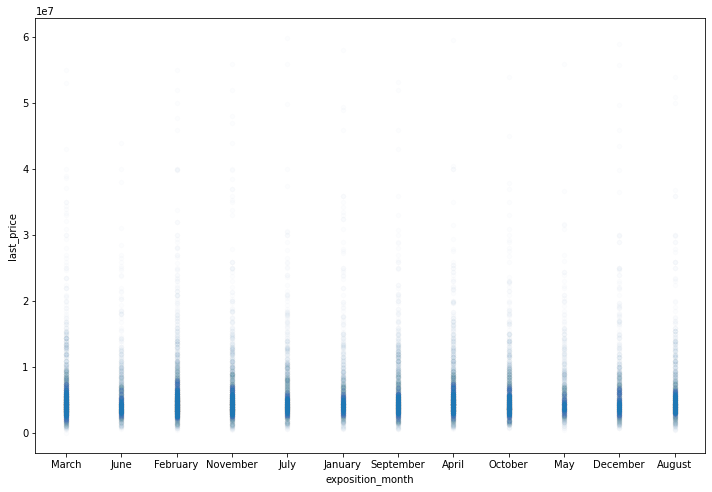

In [ ]:
good_data.pivot_table(index='exposition_month',
                      values='last_price', aggfunc='median').plot(kind='bar', figsize=(15,8), alpha=0.5)
good_data.plot(kind='scatter', x='exposition_month', y='last_price', figsize=(12,8), alpha=0.01)

Построив столбчатую диаграмму медианного значения цены и диаграмму рассеяния можем сделать вывод, что цена не зависит от месяца размещения объявления

<AxesSubplot:ylabel='Frequency'>

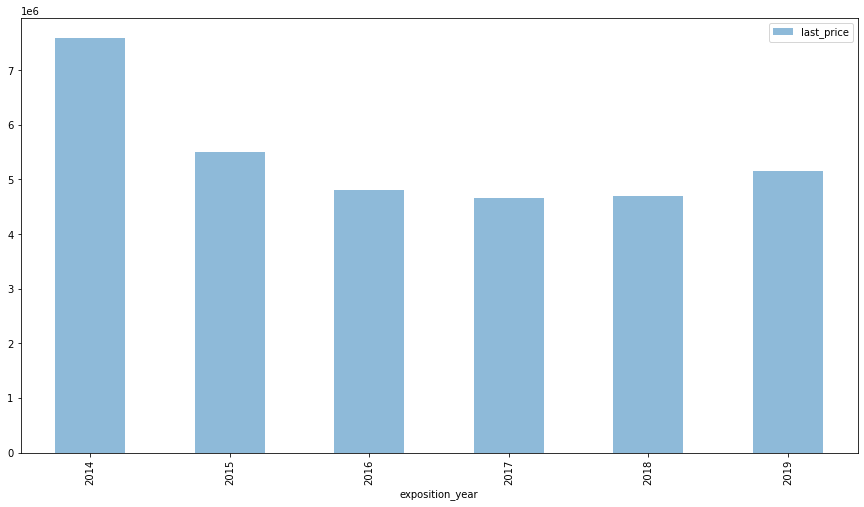

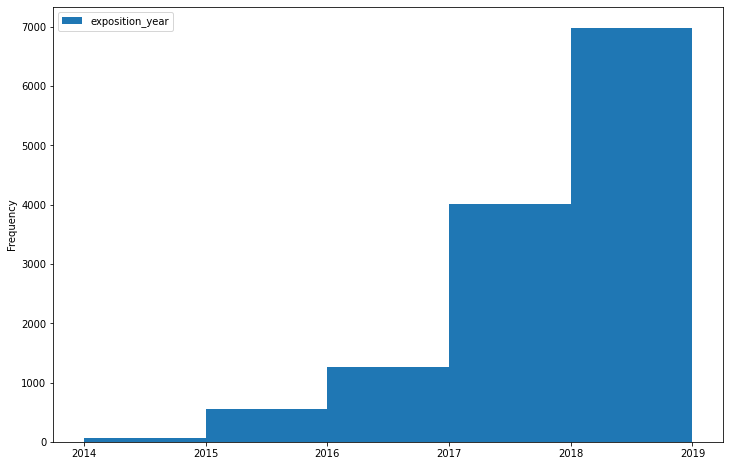

In [ ]:
good_data.pivot_table(index='exposition_year',
                      values='last_price', aggfunc='median').plot(kind='bar', figsize=(15,8), alpha=0.5)
good_data.plot(kind='hist', y='exposition_year', figsize=(12,8), bins=5)

Построив столбчатую диаграмму медианного значения цены и гистограмму распределени я предложений по годам, можем сделать вывод, что с 2014 по 2017 годы медианное значение цена на квартиры падало, а с 2017 по 2019 росло меньшими темпами, чем падало ранее. Однако исходя из распределения количества предложений по годам, можно предположить, что изменение медианной цены связано с более чем двухкратным ростом количества квартир, выставленных на продажу.

Общий вывод: из рассмотренных параметров наибольшее влияние на цену квартир имеет их общая площадь

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Найдем первую десятку населенных пунктов с наибольшим числом объявлений, сохраним их названия в список top_ten_list.
Отфильтруем датафрейм по этому списку и выведем значения средней цены, отсортированные по убыванию

In [ ]:
top_ten_list = good_data['locality_name'].value_counts().head(10).index
print(f'10 насленных пунктов с наибольшим количеством предложения квартир: {top_ten_list}')
top_ten_data = good_data.loc[good_data['locality_name'].isin(top_ten_list)]
top_ten_data.pivot_table(index='locality_name', values='square_m_price').sort_values(by='square_m_price', ascending=False)


10 насленных пунктов с наибольшим количеством предложения квартир: Index(['Санкт-Петербург', 'Всеволожск', 'Пушкин', 'Шушары', 'Мурино',
       'Колпино', 'Кудрово', 'Петергоф', 'Парголово', 'Гатчина'],
      dtype='object')


,square_m_price
locality_name,
Санкт-Петербург,112468.576047
Пушкин,102648.812207
Кудрово,96366.250000
Парголово,91177.061538
Мурино,87578.663212
Петергоф,83596.240602
Шушары,79658.071066
Колпино,75445.139037
Гатчина,69663.209302


Среди десяти населенных пунктов с наибольшим предложением квартиры, на первом месте Санкт-Петербург со средней ценой квадратного метра 112 468 руб, на последнем - Всеволожск со средней ценой квадратного метра 67 716 руб

#### Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

Сохраним в переменной spb_price_km таблицу распределения средней цены по каждому км от центра города по Санкт-Петербургу. Выведем ее на экран, а также построим график.

city_centers_km
0.0     17525267.0
1.0     12930896.0
2.0     13394829.0
3.0     10109627.0
4.0     11375846.0
5.0     12080388.0
6.0     12041447.0
7.0     11971716.0
8.0      9714789.0
9.0      7236247.0
10.0     6595837.0
11.0     6149655.0
12.0     5905670.0
13.0     6035125.0
14.0     5520540.0
15.0     5818429.0
16.0     5397183.0
17.0     5286929.0
18.0     4976794.0
19.0     4860343.0
20.0     5603333.0
21.0     5342227.0
22.0     5336039.0
23.0     5086673.0
24.0     4907500.0
25.0     4267500.0
26.0     3960643.0
27.0    14350000.0
28.0     7600000.0
29.0     4530000.0
Name: last_price, dtype: float64


<AxesSubplot:xlabel='city_centers_km'>

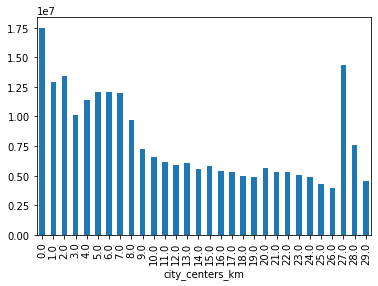

In [ ]:
spb_price_km = (
    good_data.query('locality_name=="Санкт-Петербург"').groupby('city_centers_km')['last_price'].mean().round(0)
)
print(spb_price_km)
spb_price_km.plot(kind='bar')


Наблюдаем прямую зависимость - с увеличением дальности от центра города средняя цена квартир уменьшается. Выборсы наблюдаем на расстояниях 27, 28, 29 км. Посмотрим детальнее, что там.

In [ ]:
good_data.query('locality_name=="Санкт-Петербург" and city_centers_km in [27,28,29]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,exposition_day_of_week,exposition_month,exposition_year,floor_type,city_centers_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,NaN,128.0,193919.0,Tuesday,November,2017,другой,27.0
814,0,7600000.0,111.0,2017-07-26,3,3.00,16,63.0,12,False,...,185.0,2.0,72.0,66.0,68468.0,Wednesday,July,2017,другой,28.0
11652,16,4700000.0,51.0,2016-06-07,2,2.60,5,30.0,1,False,...,NaN,0.0,NaN,539.0,92157.0,Tuesday,June,2016,первый,29.0
13031,16,4200000.0,56.8,2018-07-04,2,3.50,3,27.9,1,False,...,NaN,0.0,NaN,187.0,73944.0,Wednesday,July,2018,первый,29.0
16787,20,4850000.0,85.8,2019-04-22,3,3.60,3,49.4,2,False,...,NaN,0.0,NaN,NaN,56527.0,Monday,April,2019,другой,29.0
19892,20,4370000.0,54.7,2016-03-23,3,2.50,5,32.8,5,False,...,NaN,0.0,NaN,939.0,79890.0,Wednesday,March,2016,последний,29.0


Промежуточный вывод <br>
Видим, что для расстояния от центра города 27 и 28 км имеем всего по одному предложению квартиры, однако данные не выглядят искаженными или нереалистичными. Выброс мог произойти из-за расопложения на этом удалении от центра нового жилого квартала высокого уровня комфорта.

### Общий вывод

Было проведено исследование следующих параметров:

* общая площадь<br>
Медианное значение 52,9 кв м. 90% значений лежат в диапазоне от 31 до 114 кв.м.

* жилая площадь<br>
Медианное значение 30.5 кв м. 90% значений лежат в диапазоне от 15.6 до 69.2 кв.м.

* площадь кухни<br>
Медианное значение 9.0 кв м. 90% значений лежат в диапазоне от 5.5 до 19.7 кв.м.

* цена объекта<br>
После удаления аномалий и пропусков данных распределение параметра цена варьируется от 0.012 до 60 млн руб. Медианное значение 4.8 млн руб, 90% значений лежат в диапазоне от 2.1 до 14.9 млн руб.

* количество комнат<br>
Преобладающее количество комнат - 1,2 и 3.

* высота потолков<br>
Высота потолков варьируется от 2 до 4.5 м. Преобладающая высота - 2.5 метра.

* этаж квартиры <br>
Квартиры находятся на этажах от 1 до 30-го, 90% квартир находятся до 15 этажа. Наибольшее количество с 1 по 5.

* тип этажа квартиры («первый», «последний», «другой») <br>
Около 70% квартир находятся не на первых и последних этажах.

* общее количество этажей в доме<br>
Преобладающее большинство квартир находятся в 5-ти и 9-тиэтажных домах. Можно объяснить большим количеством типовых домов этой этажности в РФ.

* расстояние до центра города в метрах<br>
Наибольшее число квартир удалены от центра города на расстояние от 0 до 40 км. Видим всплек прежложений квартир на расстоянии от 4 до 6 км от центра, и еще бОльший всплеск предложений на расстоянии от 10 до 18 км от центра.

* расстояние до ближайшего аэропорта<br>
Наибольшее число квартир (90%) удалены от аэропорта на расстояние от 10 до 51 км. Среднее значение расстояния 26 км.

* расстояние до ближайшего парка<br>
Наибольшее число квартир (90%) удалены от парков на расстояние от 100 до 893 м. Среднее значение расстояния 476 м.

* день и месяц публикации объявления. <br>
Наблюдаем что со временем число предложений квартир растет. Наибольший рост произошел в течение 2017 года. Предложение наблюдаем сезонные спады в районе нового года. <br>
наибольшее количество новых объявлений появляется в феврале-апреле, а в мае и декабре-январе происходит спад. Вероятная причина - длинные праздники в РФ. <br>

Как быстро продавались квартиры? <br>
среднее количество дней до продажи: 192.0<br>
медианное количество дней до продажи: 107.0<br>
90% квартир продаются в период от 8 до 676 дней, медианное значение 107, менее 8 дней занимают 5% продаж - это можно считать необычно быстрыми, более 676 дней - необычно долгими. <br>

Какие факторы больше всего влияют на общую (полную) стоимость объекта? <br>
* Гипотеза 1. Цена зависит от общей площади.
Подтверждена. Наблюдаем корреляцию между ценой и общей площадью. Коэффициент корреляции 0.79. Зависимость более выражена для значений общей площади до 150 кв.м.


* Гипотеза 2. Цена зависит от жилой площади
Подтверждена. Наблюдаем корреляцию между ценой и жилой площадью. Коэффициент корреляции 0.69. Зависимость более выражена для значений жилой площади до 80 кв.м..


* Гипотеза 3. Цена зависит от площади кухни
Подтверждена. Наблюдаем корреляцию между ценой и площадью кухни. Коэффициент корреляции 0.58. Зависимость более выражена для значений площади кухни до 20 кв.м.


* Гипотеза 4 Цена зависит от количества комнат
Подтверждена частично. Наблюдаем несильную положительную корреляцию между количеством комнат и ростом цены от 1 до 4 комнат, далее зависимость размывается. Коэффициент корреляции 0.51


* Гипотеза 5. Цена зависит от этажа, на котором расположена квартира (первый, последний, другой)
Подтверждена. Квартиры на первых этажах в большинстве своем дешевле чем квартиры на последних, а те дешевле чем квартиры на промежуточных этажах


* Гипотеза 6. Цена зависит от даты размещения (день недели, месяц, год)
Не подтверждена.
- Цена не зависит от дня недели размещения объявления. <br>
- Цена не зависит от месяца размещения объявления. <br>
- С 2014 по 2017 годы медианное значение цена на квартиры падало, а с 2017 по 2019 росло меньшими темпами, чем падало ранее. Однако исходя из распределения количества предложений по годам, можно предположить, что изменение медианной цены связано с более чем двухкратным ростом количества квартир, выставленных на продажу.<br>


Из рассмотренных параметров наибольшее влияние на цену квартиры имеет ее общая площадь.<br>

По средней цене за квадратный метр.
Среди десяти населенных пунктов с наибольшим предложением квартиры, на первом месте Санкт-Петербург со средней ценой квадратного метра 112 468 руб, на последнем - Всеволожск со средней ценой квадратного метра 67 716 руб<br>

* Гипотеза 7. Стоимость объектов зависит от расстояния до центра города.<br>
Подтверждена частично. На примере города Санкт-Петербурга наблюдаем прямую зависимость - с увеличением дальности от центра города средняя цена квартир уменьшается. Однако видим резкий скачек цен на расстояниях 27 и 28 км от центра города. Предположительно, там находится новоый жилой квартал высокого уровня комфорта.
